# Data Description

The original dataset contains a total of 5,000 observations with 16 features describing the house sales of a particular region.

In [34]:
# Import libraries
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Load the dataset
files.upload()

{}

# Feature Processing
The original dataset features are divided according to their data as follows:

*   *Int Data* - MLS, zipcode, year_built, bedrooms
*   *Float Data* - sold_price, longitude, latitude, lot_acres, taxes, fireplaces
*   *Categorical Data* - bathrooms, sqrt_ft, garage, kitchen_features, floor_covering, HOA

However, observing the type of data shown in the header, we can observe that some features could benefit from a change of data type.

In [35]:
data = pd.read_csv("/content/Germán Eduardo Baltazar Reyes - raw_house_data.csv")
print(data.head(3),'\n')
print(data.dtypes,'\n')

#Check and delete for duplicates
print(f"Number of duplicate rows: {data[data.duplicated()].shape}\n")
data.drop_duplicates()

#Check for null values
print(data.isnull().sum())

        MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362     2154.0   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213     1707.0  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844     1707.0  10482.00   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
2        1997         2         3    None   None   

                             kitchen_features  fireplaces  \
0     Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                Dishwasher, Garbage Disposal         5.0   
2  Dishwasher, Garbage Disposal, Refrigerator         5.0   

               floor_covering   HOA  
0          Mexican Tile, Wood     0  
1        Natural Stone, Other     0  
2  Natural Stone, Other: Rock  None   

MLS                   int64
sold_price          float64
zipcode        

In [36]:
""" bathrooms analysis

This feature should indicate the number of bathrooms a house has, hence being a
numerical feature. The fact that it's a categorical one means there should be 
some other representations to that numeric data"""

feature = data['bathrooms']

# Check the unique values of the feature
print(np.unique(feature))

# Convert every 'None' value into a 0, then turn everything to float
for i in range(len(feature)):
  value = feature[i]
  if value == 'None':
    feature[i] = 0.0
  else:
    feature[i] = float(value)

data['bathrooms'] = feature
data['bathrooms'] = data['bathrooms'].astype(float)
#print(np.unique(feature))

['1' '10' '11' '14' '15' '18' '2' '2.5' '3' '3.5' '35' '36' '4' '4.5' '5'
 '6' '7' '8' '9' 'None']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [37]:
""" sqrt_ft analysis

This feature should indicate the squared feet a house has, hence being a
numerical feature. The same process as with the bathrooms will be done."""

feature = data['sqrt_ft']

# Check the unique values of the feature
print(np.unique(feature))

# Convert every 'None' value into a 0, then turn everything to float
for i in range(len(feature)):
  value = feature[i]
  if value == 'None':
    feature[i] = 0.0
  else:
    feature[i] = float(value)

data['sqrt_ft'] = feature
data['sqrt_ft'] = data['sqrt_ft'].astype(float)
#print(np.unique(feature))

['10258' '10318' '10417' ... '9630' '9858' 'None']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [38]:
""" The same procedure will be followed for garage and HOA """

feature = data['garage']

# Check the unique values of the feature
print(np.unique(feature))

# Convert every 'None' value into a 0, then turn everything to float
for i in range(len(feature)):
  value = feature[i]
  if value == 'None':
    feature[i] = 0.0
  else:
    feature[i] = float(value)

data['garage'] = feature
data['garage'] = data['garage'].astype(float)
#print(np.unique(feature))

['0' '1' '10' '11' '12' '13' '15' '2' '2.5' '20' '22' '3' '3.5' '30' '4'
 '4.5' '5' '6' '7' '8' '9' 'None']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [39]:
""" In the particular case of HOA, the commas will be exchanged for dots """

feature = data['HOA']

# Check the unique values of the feature
print(np.unique(feature))

# Convert every 'None' value into a 0, then turn everything to float
for i in range(len(feature)):
  value = feature[i]
  if value == 'None':
    feature[i] = 0.0
  else:
    value = value.replace(',','.')
    feature[i] = float(value)

data['HOA'] = feature
data['HOA'] = data['HOA'].astype(float)
#print(np.unique(feature))

['0' '1' '1,000' '1,010' '1,100' '1,200' '1,270' '1,290' '1,600' '1,717'
 '1,769' '10' '10.83' '100' '101' '102' '103' '104' '105' '106' '107'
 '108' '109' '11' '11.08' '110' '111' '112' '112.38' '113' '114' '115'
 '116' '117' '118' '119' '119.66' '12' '120' '121' '122' '123' '123.44'
 '124' '125' '126' '127' '128' '129' '13' '130' '131' '132' '132.66' '133'
 '134' '134.5' '135' '136' '137' '138' '139' '14' '14.58' '140' '141'
 '141.66' '141.67' '142' '143' '144' '145' '145.83' '146' '147' '148'
 '149' '149.04' '149.5' '15' '15.41' '15.45' '150' '151' '152' '153' '154'
 '155' '156' '157' '157.33' '158' '159' '16' '16.66' '16.67' '160' '161'
 '162' '164' '165' '166' '166.66' '167' '168' '168.92' '169' '17' '170'
 '171' '172' '173' '174' '175' '176' '177' '177.34' '178' '179' '18'
 '18.75' '180' '183' '184' '185' '186' '187' '188' '188.33' '189' '19'
 '19,480' '190' '191' '192' '193' '193.5' '194' '194.51' '195' '198' '199'
 '2' '2,000' '2.08' '20' '20,000' '20.83' '200' '202' '202.75' '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Encode the categorical features

Since categorical data is more difficult to analyze with numerical values (even more when grouped a large amount of text on the same cell). One of the best options is to encode the presence of each characteristic into a vector.

A regular encoder will be used instead of a one-hot vector, since its easier to have one single vector measuring the presence of every characteristic.

In [40]:
""" For the kitchen_features feature, it is necessary to first separate the
characteristics into different columns. After that, we can observe which ones
each house contains, and then create a new column with the vectorized
representations of them (not one-hot encoders). """

# Join every single characteristic into one list
feature = data["kitchen_features"]
kitchen_chars = []
kitchen_vectors = []

for i in feature:
  description = i.lower().split(",")
  kitchen_chars += description

# Check the unique characteristics on the list
print(np.unique(kitchen_chars))

# Create a vector with all the unique values
labels = []

for i in kitchen_chars:
  if ':' in i:
    aux = i.split(':')[0]
    labels.append(aux) #Just keep the general feature
    #print(f"Saving {aux}")
  else:
    labels.append(i)
    #print(f"Saving {i}")

labels = np.unique(labels)  #These labels should be given to the programming team as additional data

for i in feature:
  encoder = np.zeros(len(labels))
  description = i.lower().split(",")

  for j in description:
    if ':' in j:
      j = j.split(':')[0]
    
    for k in range(len(labels)):
      if labels[k] == j:
        encoder[k] = 1
  
  kitchen_vectors.append(encoder)

# Create the column with the encoded vectors
data['kitchen_vectors'] = kitchen_vectors
#print(kitchen_vectors)

[' above oven' ' appliance color: almond' ' appliance color: black'
 ' appliance color: other' ' appliance color: stainless'
 ' appliance color: white' ' black' ' built in' ' butch block'
 ' convection' ' countertops: .' ' countertops: brazilian granite'
 ' countertops: brazillian slate' ' countertops: butcher block on isl'
 ' countertops: butcherblock/concret' ' countertops: caesar stone'
 ' countertops: caesarstone' ' countertops: carrera marble'
 ' countertops: ceasarstone' ' countertops: ceaserstone'
 ' countertops: cement-laminate' ' countertops: ceramic'
 ' countertops: ceramic tile' ' countertops: chiseled granite'
 ' countertops: chisled edge granite' ' countertops: colored concrete'
 ' countertops: combo' ' countertops: composite'
 ' countertops: composite granite' ' countertops: concrete'
 ' countertops: concrete/wood' ' countertops: conrete/stone'
 ' countertops: corain' ' countertops: corian'
 ' countertops: corian - wood' ' countertops: corion'
 ' countertops: corrian' ' c

In [41]:
""" Repeat the process for floor_covering """

# Join every single characteristic into one list
feature = data["floor_covering"]
floor_chars = []
floor_vectors = []

for i in feature:
  description = i.lower().split(",")
  floor_chars += description

# Check the unique characteristics on the list
print(np.unique(floor_chars))

# Create a vector with all the unique values
labels = []

for i in floor_chars:
  if ':' in i:
    aux = i.split(':')[1].split()[0] #Save the first keyword of the description after the ':'
    labels.append(aux) #Just keep the general feature
    #print(f"Saving {aux}")
  else:
    labels.append(i)
    #print(f"Saving {i}")

labels = np.unique(labels)  #These labels should be given to the programming team as additional data

for i in feature:
  encoder = np.zeros(len(labels))
  description = i.lower().split(",")

  for j in description:
    if ':' in j:
      j = j.split(':')[1]
    
    for k in range(len(labels)):
      if labels[k] == j:
        encoder[k] = 1
  
  floor_vectors.append(encoder)

# Create the column with the encoded vectors
data['floor_vectors'] = floor_vectors
#print(floor_vectors)

[' ceramic tile' ' concrete' ' granite' ' indoor/outdoor' ' laminate'
 ' mexican tile' ' natural stone' ' other' ' other: 20 x 20 on diagonal'
 ' other: acrylic overlay' ' other: bamboo' ' other: brazilian pergo'
 ' other: brick' ' other: brick floor' ' other: brick in studio'
 ' other: brick inlayed' ' other: brick pavers' ' other: canterra stone'
 ' other: carpet bedrooms only' ' other: carpet- guest house'
 ' other: cement tiles/bamboo' ' other: concrete tile' ' other: cork'
 ' other: custom saltillo' ' other: dyed concrete'
 ' other: egytian sandstone' ' other: eng wood' ' other: engineered wood'
 ' other: flagstone' ' other: gray saltillo' ' other: hardwood'
 ' other: high end laminate' ' other: itailian porclaine'
 ' other: italian tile' ' other: lime stone' ' other: limestone'
 ' other: lux vinyl' ' other: marble' ' other: marble-master bath'
 ' other: master bedroom/ tile' ' other: mesquite wood floors'
 ' other: multiple types' ' other: new plank tile'
 ' other: new wood plank

In [42]:
# Show how the dataset is composed after modifying its features
print(data.head(3),'\n')
print(data.dtypes)

        MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362     2154.0   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213     1707.0  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844     1707.0  10482.00   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0        1941        13       10.0  10500.0     0.0   
1        1997         2        2.0   7300.0     0.0   
2        1997         2        3.0      0.0     0.0   

                             kitchen_features  fireplaces  \
0     Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                Dishwasher, Garbage Disposal         5.0   
2  Dishwasher, Garbage Disposal, Refrigerator         5.0   

               floor_covering  HOA  \
0          Mexican Tile, Wood  0.0   
1        Natural Stone, Other  0.0   
2  Natural Stone, Other: Rock  0.0   

                                     kitchen_vectors  \
0  [

# Outliers and NaN Values

Once the data has a proper type and any additional information is added, the next step is to determine what to do with the missing values and any possible outlier that exists on the dataset.

In this case, since the omission of the rows with NaN values does not create a significant variance on the correlation matrix, it is safe to say that it is ok to remove those files from the dataset.

In [43]:
# Determine the percentage of missing data in the features with NaN values
nan_acres = (data['lot_acres'].isnull().sum() * 100) / len(data['lot_acres'])
nan_fireplaces = (data['fireplaces'].isnull().sum() * 100) / len(data['fireplaces'])

print(f"The {nan_acres}% of lot_acres has a NaN value...")
print(f"The {nan_fireplaces}% of fireplaces has a NaN value...\n")

The 0.2% of lot_acres has a NaN value...
The 0.5% of fireplaces has a NaN value...



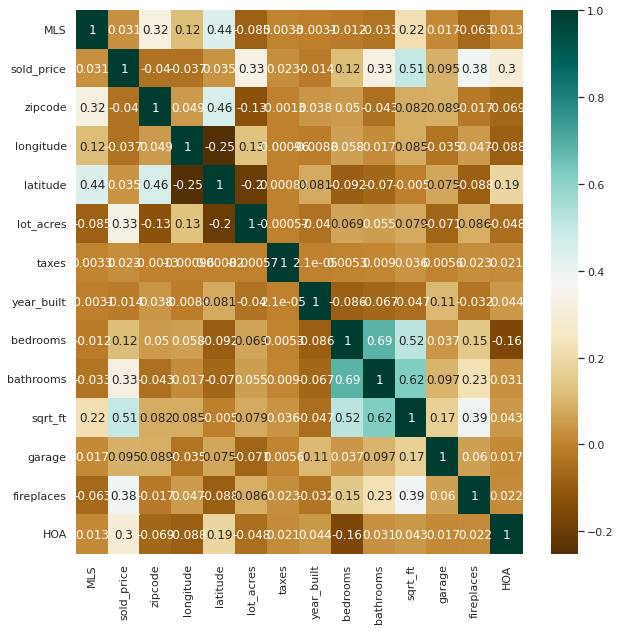

In [44]:
""" Compare the correlation of features with and without those NaN values to see
if its ok to delete them. It may be possible that the rows with NaN values still
have important values on other features. """

plt.figure(figsize=(10,10))
heat1 = data.corr()
sns.heatmap(heat1,cmap="BrBG",annot=True)

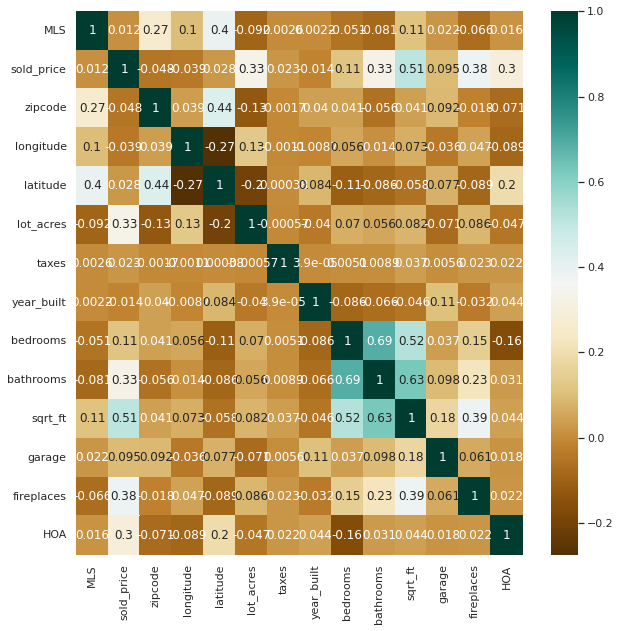

In [45]:
#Delete the NaN values and get the correlation matrix
temporal_data = data
temporal_data = temporal_data.dropna()

plt.figure(figsize=(10,10))
heat2 = temporal_data.corr()
sns.heatmap(heat2,cmap="BrBG",annot=True)

In [46]:
# Remove from the dataset the NaN-value rows since there's no significant correlation modification
data = temporal_data
print(f"There's now a total of {len(data)} observations\n")
print(data.head(),'\n')
print(data.shape)

There's now a total of 4973 observations

        MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0        1941        13       10.0  10500.0     0.0   
1        1997         2        2.0   7300.0     0.0   
2        1997         2        3.0      0.0     0.0   
3        1930         7        5.0   9019.0     4.0   
4        1995         4        6.0   6396.0     3.0   

                                    kitchen_features  fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven         6.0   
1         

# Analyze Features Outliers

MLS           396951.000000
sold_price    252500.000000
zipcode           32.000000
longitude          0.120095
latitude           0.117006
lot_acres          1.170000
taxes           3283.000000
year_built        19.000000
bedrooms           1.000000
bathrooms          1.000000
sqrt_ft         1084.000000
garage             1.000000
fireplaces         2.000000
HOA              122.000000
dtype: float64


[Text(0.5, 1.0, 'HOA')]

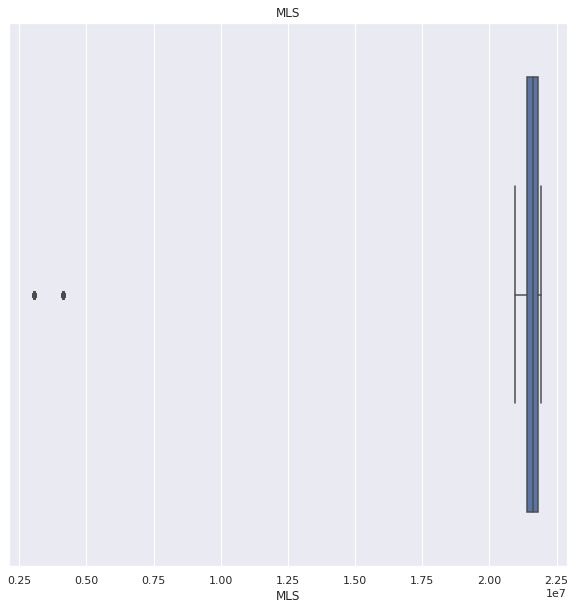

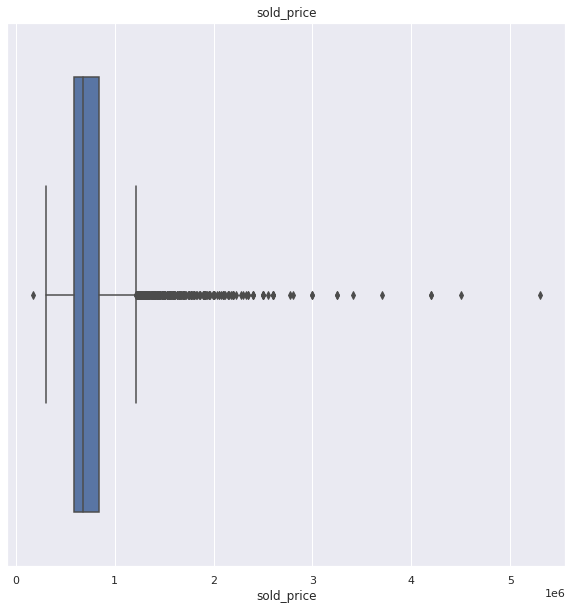

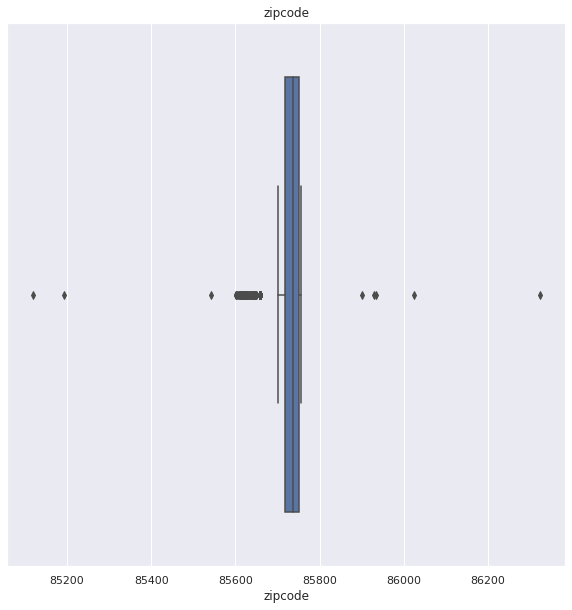

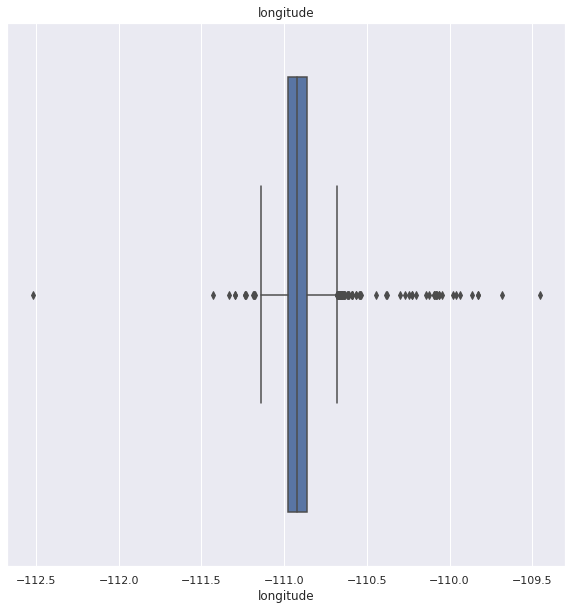

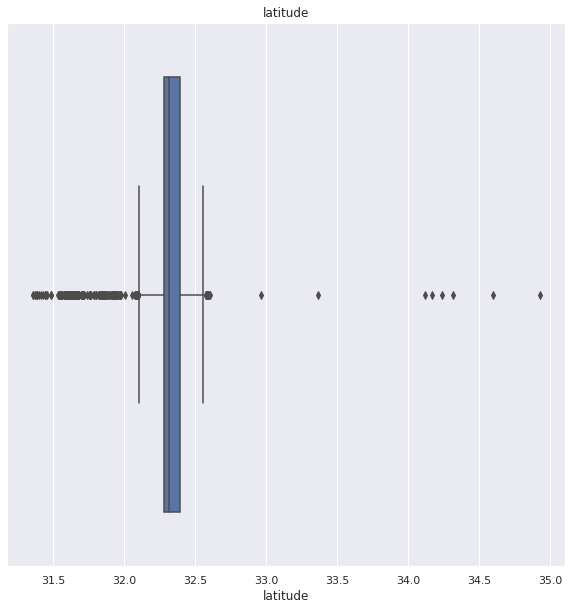

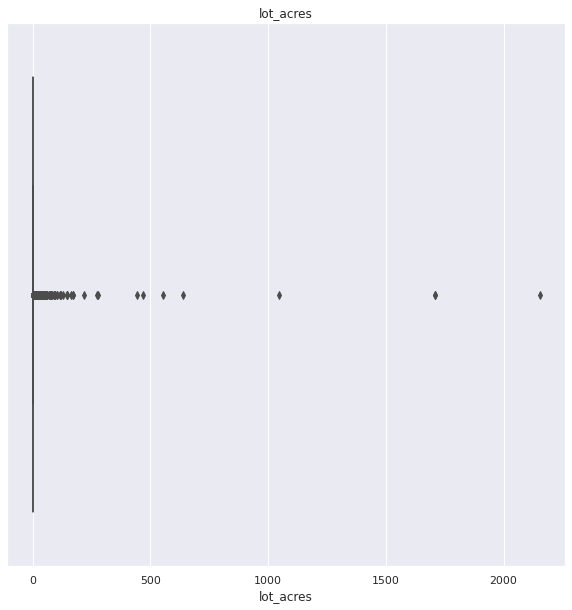

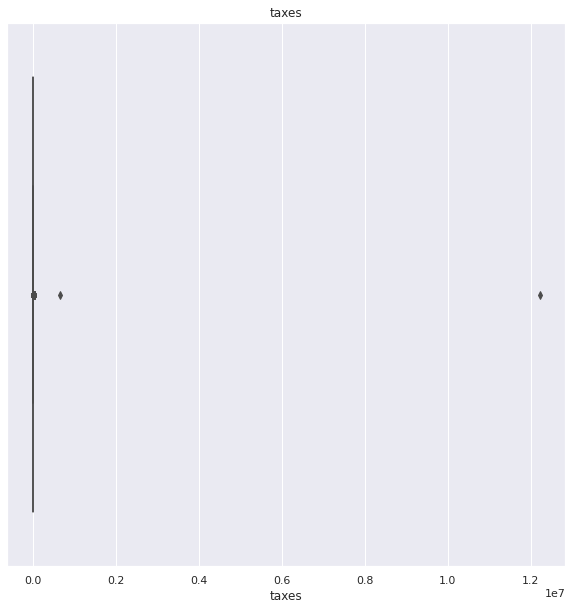

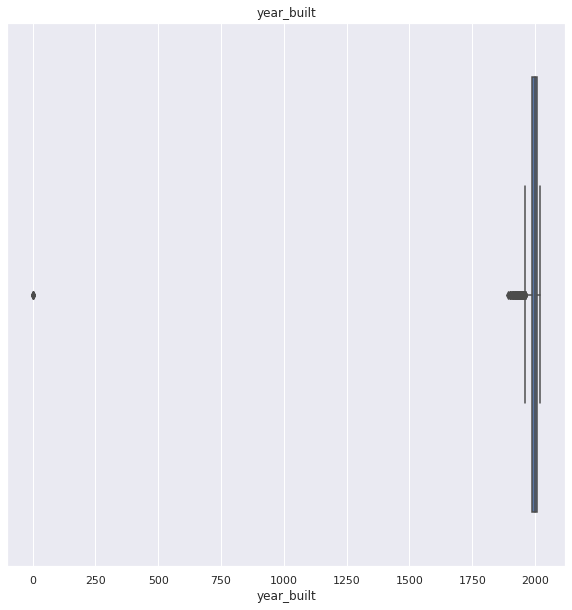

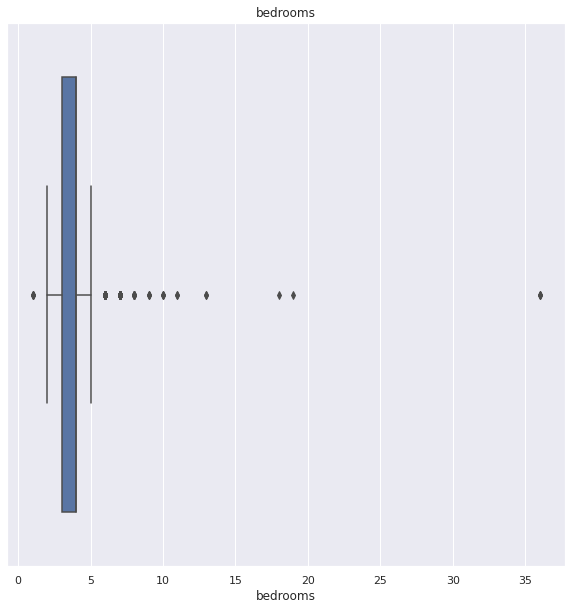

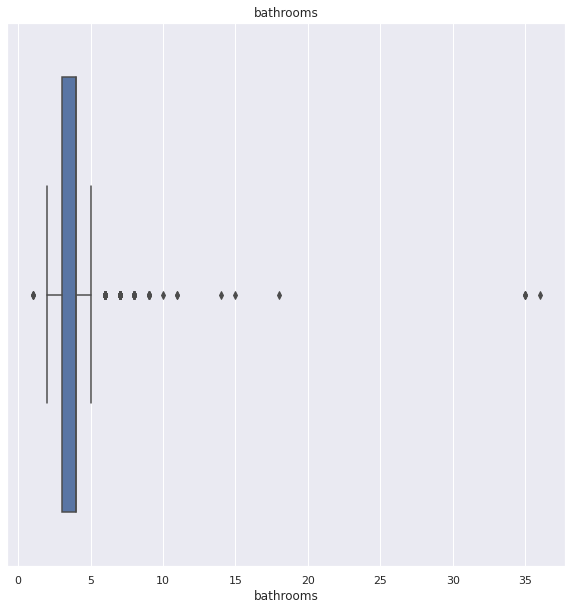

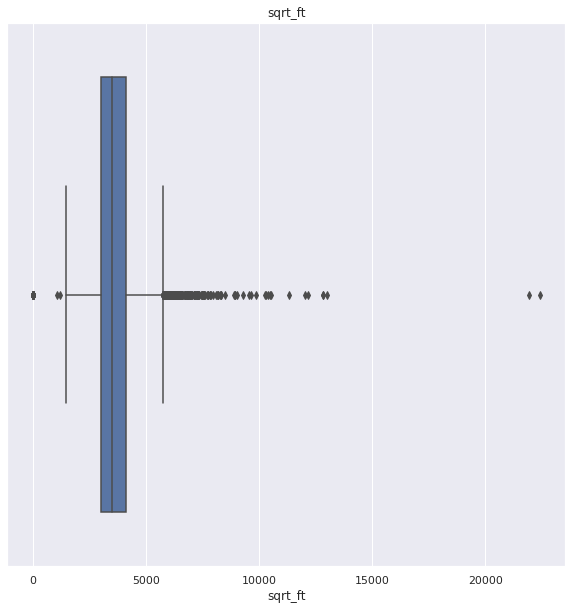

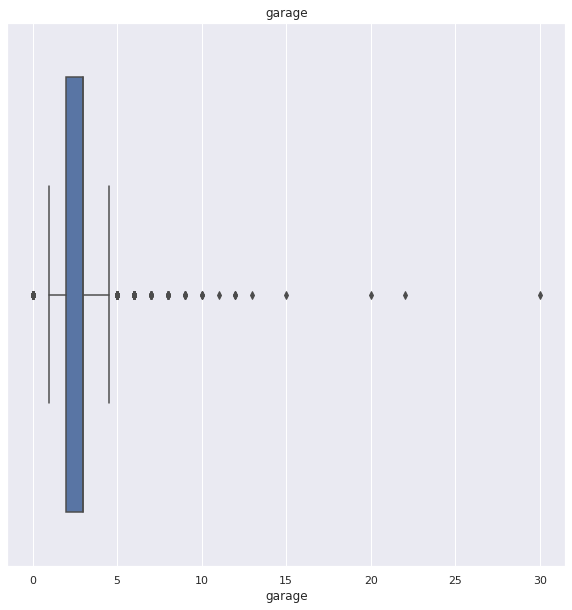

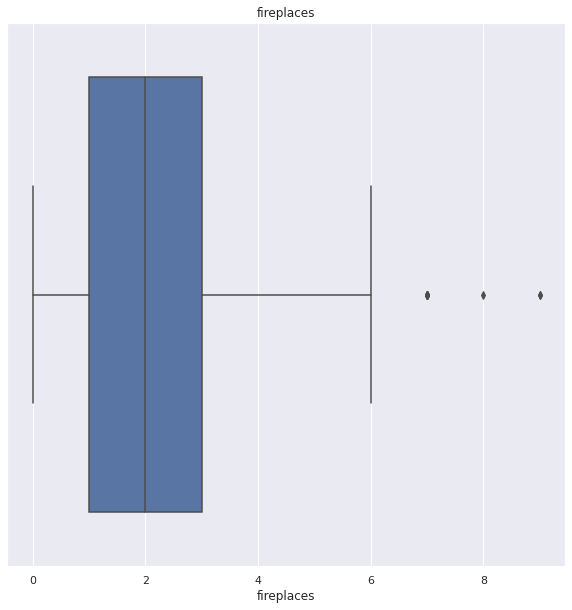

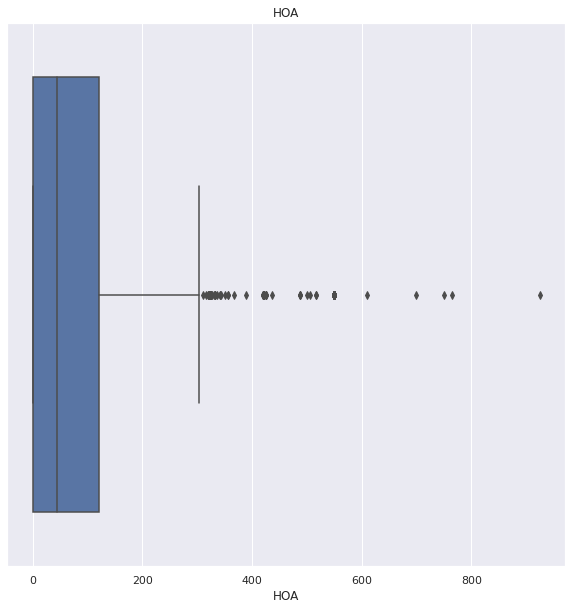

In [47]:
""" The next step will be to analyze each feature of the dataset to determine 
its outliers, and depending on its percentage, eliminate them. """

# Get the IQR score of each numerical feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Print the box plots of each feature to observe its outliers
plt.figure(figsize=(10,10))
sns.boxplot(x=data['MLS']).set(title='MLS')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['sold_price']).set(title='sold_price')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['zipcode']).set(title='zipcode')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['longitude']).set(title='longitude')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['latitude']).set(title='latitude')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['lot_acres']).set(title='lot_acres')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['taxes']).set(title='taxes')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['year_built']).set(title='year_built')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['bedrooms']).set(title='bedrooms')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['bathrooms']).set(title='bathrooms')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['sqrt_ft']).set(title='sqrt_ft')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['garage']).set(title='garage')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['fireplaces']).set(title='fireplaces')
plt.figure(figsize=(10,10))
sns.boxplot(x=data['HOA']).set(title='HOA')

It seems ok to delete the outliers of most of the numerical features, except the ones of *lot_acres* and *taxes*, since it appears that all the data is tending to a value of zero.

It is necessary to do an individual analysis of these two features. Just to be sure, the individual analysis of the other features will be done as well to determine its behavior.

In [48]:
""" MLS analysis shows that every single value appears only one time, meaning
that this feature does not provide useful, generic information to any model
since its not sequential. This means that its ok to delete this feature from the
dataset. """

#Find how many have a zero-value
feature = data['MLS']

print(feature.value_counts())

21530491    1
21321578    1
21802919    1
21804483    1
21800670    1
           ..
21903561    1
21911050    1
21826710    1
21905698    1
4111490     1
Name: MLS, Length: 4973, dtype: int64


In [49]:
""" sold_price analysis """

#Find how many have a zero-value
feature = data['sold_price']

print(feature.value_counts())

550000.0    138
575000.0    102
650000.0     96
600000.0     92
625000.0     82
           ... 
827000.0      1
771500.0      1
811250.0      1
793008.0      1
526710.0      1
Name: sold_price, Length: 1090, dtype: int64


In [50]:
""" zipcode analysis """

#Find how many have a zero-value
feature = data['zipcode']

print(feature.value_counts())

85718    1326
85750     779
85755     461
85749     401
85658     288
85737     281
85742     162
85745     155
85739     154
85716     107
85704      97
85715      94
85719      76
85743      76
85641      68
85748      60
85646      55
85712      44
85614      39
85623      31
85730      27
85637      27
85622      23
85747      15
85701      14
85705      12
85629      12
85624      10
85630       9
85611       9
85645       7
85619       7
85711       6
85648       5
85621       5
85640       4
85615       3
85601       2
85643       2
85710       2
85610       2
85602       2
85609       1
86024       1
86323       1
85118       1
85605       1
85929       1
85541       1
85713       1
85625       1
85935       1
85603       1
85901       1
85638       1
85192       1
Name: zipcode, dtype: int64


In [51]:
""" longitude analysis """

#Find how many have a zero-value
feature = data['longitude']

print(feature.value_counts())

-110.867433    4
-110.939977    3
-110.923425    3
-110.942298    3
-110.910188    3
              ..
-110.842520    1
-110.947012    1
-110.973287    1
-110.961107    1
-110.913054    1
Name: longitude, Length: 4742, dtype: int64


In [52]:
""" latitude analysis """

#Find how many have a zero-value
feature = data['latitude']

print(feature.value_counts())

32.324652    3
32.231485    3
32.297649    3
32.294131    3
32.246575    3
            ..
32.291728    1
32.284311    1
32.318140    1
31.627415    1
31.385259    1
Name: latitude, Length: 4799, dtype: int64


In [53]:
""" lot_acres analysis """

#Find how many have a zero-value
feature = data['lot_acres']
print(len(feature.loc[feature == 1]))

print(feature.value_counts())

135
1.00     135
0.83      90
3.31      69
3.30      64
0.80      59
        ... 
2.72       1
8.11       1
5.19       1
2.39       1
12.06      1
Name: lot_acres, Length: 644, dtype: int64


For the case of the *lot_acres*, it is now observed that the size of the terrains in general is not too big, so it is ok to eliminate its original outliers.

In [54]:
""" taxes analysis """
print(Q3[6])
#Find how many have a zero-value
feature = data['taxes']
print(feature.value_counts(),'\n')
print(f"{(len(data.loc[data['taxes'] == 0]) * 100) / len(data['taxes'])}% of the observations have a 0 value")

8100.0
0.00        22
1122.94      9
900.22       9
845.18       7
1288.81      7
            ..
6740.66      1
4484.14      1
8385.34      1
10707.96     1
2814.48      1
Name: taxes, Length: 4702, dtype: int64 

0.4423889000603258% of the observations have a 0 value


In this case, since the percentage of values with a zero value is lesser than the 0.5%, it is ok to assume that we can delete those values, centering our data into more realistic information.

In [55]:
""" year_built analysis """

#Find how many have a zero-value
feature = data['year_built']

print(feature.value_counts())

2006    246
2002    234
2005    230
2007    229
2004    202
       ... 
1913      1
1923      1
1907      1
1911      1
1927      1
Name: year_built, Length: 112, dtype: int64


In [56]:
""" bedrooms analysis """

#Find how many have a zero-value
feature = data['bedrooms']

print(feature.value_counts())

4     2385
3     1387
5      868
2      160
6      114
7       32
8        8
1        4
9        3
10       3
36       3
13       2
11       2
19       1
18       1
Name: bedrooms, dtype: int64


In [57]:
""" bathrooms analysis """

#Find how many have a zero-value
feature = data['bathrooms']

print(feature.value_counts())

3.0     1984
4.0     1831
5.0      654
6.0      207
2.0      188
7.0       58
8.0       19
9.0        8
3.5        7
2.5        3
1.0        3
35.0       3
11.0       2
10.0       1
4.5        1
14.0       1
18.0       1
15.0       1
36.0       1
Name: bathrooms, dtype: int64


In [58]:
""" sqrt_ft analysis """

#Find how many have a zero-value
feature = data['sqrt_ft']

print(feature.value_counts(),'\n')
print(f"{(len(data.loc[data['taxes'] == 0]) * 100) / len(data['taxes'])}% of the observations have a 0 value")

3541.0    50
0.0       29
3052.0    25
3420.0    18
3002.0    16
          ..
4362.0     1
5586.0     1
5117.0     1
3793.0     1
1772.0     1
Name: sqrt_ft, Length: 2362, dtype: int64 

0.4423889000603258% of the observations have a 0 value


It's not consistent that a house has information of its structure and cost if it doesn't have squared feet. This means that it is necessary to convert those zero values into the mean of its corresponding area.

In [59]:
""" garage analysis """

#Find how many have a zero-value
feature = data['garage']

print(feature.value_counts())

3.0     2780
2.0     1331
4.0      382
0.0      191
5.0       87
6.0       61
2.5       46
1.0       30
3.5       16
8.0       14
7.0       13
9.0        6
4.5        4
12.0       3
10.0       3
15.0       1
22.0       1
30.0       1
11.0       1
20.0       1
13.0       1
Name: garage, dtype: int64


In [60]:
""" fireplaces analysis """

#Find how many have a zero-value
feature = data['fireplaces']

print(feature.value_counts())

1.0    1804
2.0    1604
3.0     849
0.0     303
4.0     294
5.0      89
6.0      18
7.0       9
9.0       2
8.0       1
Name: fireplaces, dtype: int64


In [61]:
""" HOA analysis """

#Find how many have a zero-value
feature = data['HOA']

print(feature.value_counts())

0.00      1380
5.00       123
100.00     106
50.00       85
40.00       72
          ... 
332.67       1
43.01        1
332.66       1
147.00       1
78.65        1
Name: HOA, Length: 375, dtype: int64


# Deleting the Outliers

Once the outlier analysis was made, it is safe to delete those values that are deemed unecessary to the dataset.

In [62]:
#Delete the MLS column from the dataset
data.drop('MLS', inplace=True, axis=1)

print(data.shape)

(4973, 17)


In [63]:
#Delete the zero values of the 'taxes' feature and anything above its Q3 value
data = data[~((data['taxes'] == 0) & (data['taxes'] > Q3[6]))]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

#Delete the zero values of the 'sqrt_ft' feature
data = data[~(data['sqrt_ft'] == 0)]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

#Delete the values of the 'year_built' feature lower than the 1800's
data = data[~(data['year_built'] < 1800)]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

#Delete the values of the 'sold_price' feature lower than the 1800's
data = data[~(data['sold_price'] >= 3e6)]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

#Delete the values of the 'zipcode' feature between 85400 and 86000
data = data[~((data['zipcode'] >= 86000) & (data['zipcode'] <= 85400))]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

#Delete the values of the 'lot_acres' feature bigger than the 500
data = data[~(data['lot_acres'] >= 500)]
print(data.shape)
print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

(4973, 17)
27 rows were eliminated from the dataset. An equivalent of 0.54% of the data.

(4944, 17)
56 rows were eliminated from the dataset. An equivalent of 1.12% of the data.

(4939, 17)
61 rows were eliminated from the dataset. An equivalent of 1.22% of the data.

(4930, 17)
70 rows were eliminated from the dataset. An equivalent of 1.4% of the data.

(4930, 17)
70 rows were eliminated from the dataset. An equivalent of 1.4% of the data.

(4928, 17)
72 rows were eliminated from the dataset. An equivalent of 1.44% of the data.



In [64]:
#Delete the outliers of the features that present a small amount of outliers
cols = ['longitude','latitude','fireplaces']
iqrs = [3,4,12]

for i in range(len(cols)):
  print(f"Checking {cols[i]}")
  data = data[~((data[cols[i]] < (Q1[iqrs[i]] - 1.5 * IQR[iqrs[i]])) | (data[cols[i]] > (Q3[iqrs[i]] + 1.5 * IQR[iqrs[i]])))]

  print(data.shape)
  print(f"{5000-data.shape[0]} rows were eliminated from the dataset. An equivalent of {((5000-data.shape[0])*100)/5000}% of the data.\n")

Checking longitude
(4826, 17)
174 rows were eliminated from the dataset. An equivalent of 3.48% of the data.

Checking latitude
(4634, 17)
366 rows were eliminated from the dataset. An equivalent of 7.32% of the data.

Checking fireplaces
(4627, 17)
373 rows were eliminated from the dataset. An equivalent of 7.46% of the data.



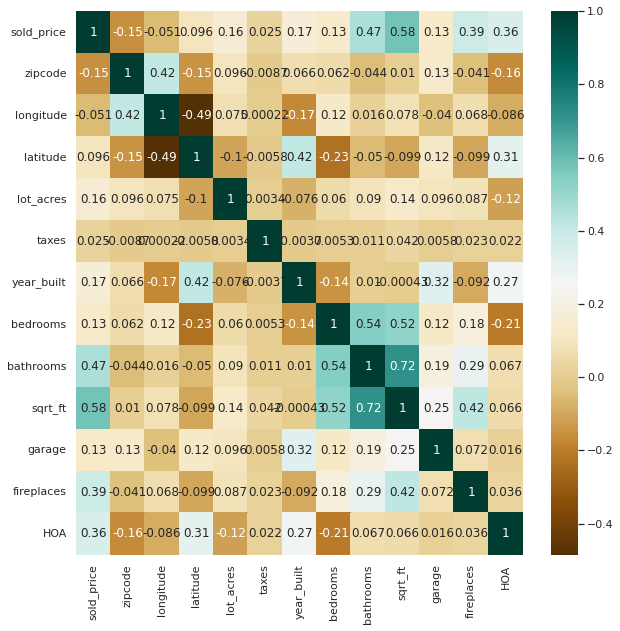

In [65]:
# Check the final correlation matrix of the dataset

plt.figure(figsize=(10,10))
heat = data.corr()
sns.heatmap(heat,cmap="BrBG",annot=True)

# Download the new dataset

In [66]:
data.to_csv("Germán Eduardo Baltazar Reyes - raw_house_data_modified.csv")